# Fuzzy controller example in Python -- the Tipping Problem:

In this notebook, you will see an example of a fuzzy controller for the "Tipping Problem" (from the [skfuzz documentation](https://scikit-fuzzy.github.io/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html)):

_Let’s create a fuzzy control system which models how you might choose to tip at a restaurant. When tipping, you consider the service and food quality, rated between 0 and 10. You use this to leave a tip of between 0 and 25%._ .

We will use an existing fuzzy control package for Python, ```skfuzz```.

[ Documentation for skfuzz ](https://scikit-fuzzy.github.io/scikit-fuzzy/) (_note_: the documentation is not always perfect or completely up to date, but you can use the ```help(...)``` function in a code cell below to learn more about functions and arguments.)



First, we will install ```skfuzz``` (you should get version 0.4.2 or newer):

In [ ]:
! pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.5 MB/s eta 0:00:00


## Inputs and outputs

Below, we define the inputs and outputs for the fuzzy controller.

Note that we use ```arange()``` from the ```numpy``` (or NumPy) library. ```arange()``` returns evenly spaced values within a given interval. The ```numpy``` library is a very widely used third-party library.

[Read more about NumPy](https://numpy.org/)

[Read more about NumPy's ```arange()```](https://realpython.com/how-to-use-numpy-arange/)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

#  Membership functions for quality:
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [2, 5, 8])
quality['good'] =  fuzz.trimf(quality.universe, [5, 10, 10])

#  Membership functions for service:
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] =  fuzz.trimf(service.universe, [5, 10, 10])

# Membership functions for tip:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])


We can now view the antecedents and the consequent:

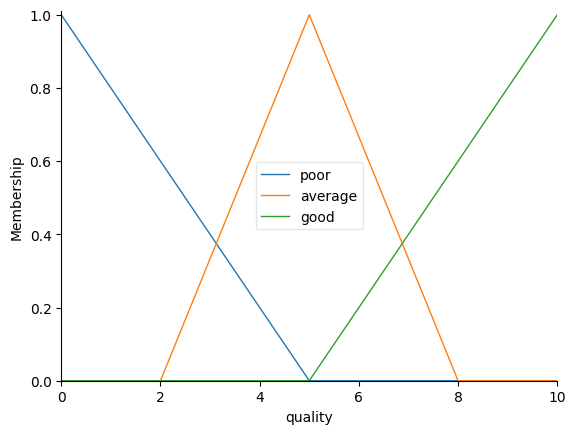

In [ ]:
quality.view()

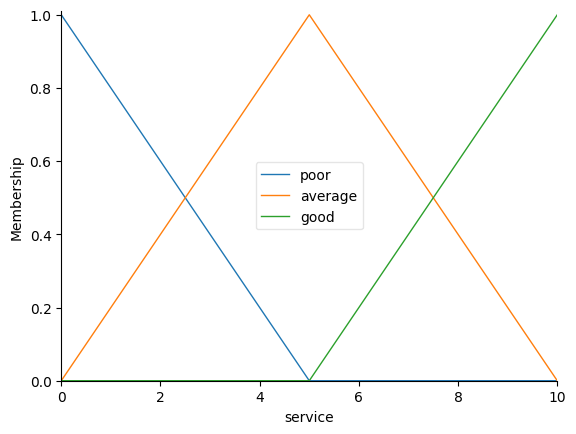

In [ ]:
service.view()

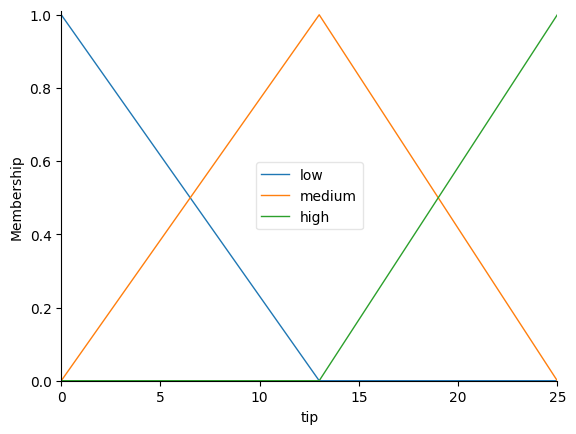

In [ ]:
tip.view()

## Fuzzy rules

Now, to make these triangles useful, we define the *fuzzy relationship*
between input and output variables. For the purposes of our example, consider
three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the
imprecise rules into a defined, actionable tip is a challenge. This is the
kind of task at which fuzzy logic excels.

In [ ]:
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])


## Control System Creation and Simulation

Now that we have our rules defined, we can simply create a control system
via:

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In order to simulate this control system, we will create a
``ControlSystemSimulation``.  Think of this object representing our controller
applied to a specific set of cirucmstances.  For tipping, this might be tipping
Sharon at the local brew-pub.  We would create another
``ControlSystemSimulation`` when we're trying to apply our ``tipping_ctrl``
for Travis at the cafe because the inputs would be different.


In [ ]:
tipping_sim = ctrl.ControlSystemSimulation(tipping_ctrl)


We can now simulate our control system by simply specifying the inputs
and calling the ``compute`` method.  Suppose we rated the quality 6.5 out of 10
and the service 9.8 of 10.

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping_sim.input['quality'] = 6.5
tipping_sim.input['service'] = 9.8

# Crunch the numbers
tipping_sim.compute()


Once computed, we can view the result as well as visualize it.


We should tip 19%


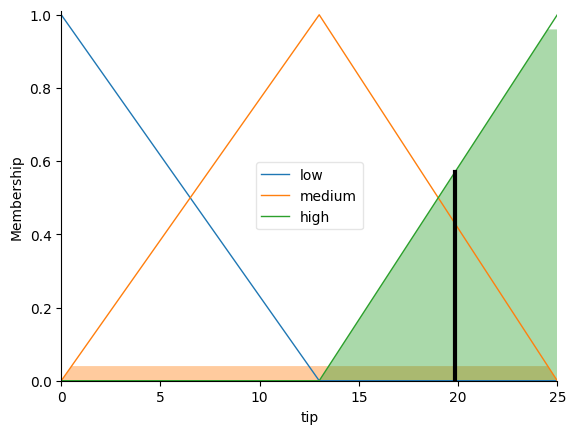

In [ ]:
# We round the input down to the nearest int:
print("We should tip {}%".format(int(tipping_sim.output['tip'])))
tip.view(sim=tipping_sim)


## Notes

Try to play with the above example:
* Change the input values in a for-loop and print the results
* Change the membership functions of the inputs and outputs, both their shapes and their definitions
* Try to find out how to change the defuzzification method (it may involve some searching online)